# Flow Distribution for the Two Treatment Trains
## Problem Definition
The two 60 L/s trains need proper flow control. They need a flow control system to split the plant flow evenly between the two trains that would enable fine grain flow control. This distribution system should keep flow control for each train independent - such that decreasing one train's flow doesn't increase the other's. 

## Existing Conduction Line
The existing conduction line is composed of two independent pipes of 4" and 6" size. Presumably, one was added after the other in an attempt to augment the flow rate. Two pressure breaks, one for each line, are located 30 meters higher in elevation and 455 meters away from the proposed plant site. By definition, these two pressure breaks have a free surface, and therefore the difference in elevation between the pressure break and the plant's entrance tank represents the maximum available head for delivering, splitting and controlling the flow. The diagram below summarizes the existing system components:

<img src="https://docs.google.com/drawings/d/e/2PACX-1vTYoz334ZI_fy6hpKUyfmm7Ap24bQDkuBVZXC4JJvACmSd-VeLFAUI5RsWscA-FHlxnKEQmn-Kz-H0U/pub?w=1056&h=816">

## Use the Existing 4" and 6" Lines
The simplest solution is to use the current pressure break as the flow distribution system with the two existing lines (4" and 6") as the incoming lines for each train. To make sure this will work, we need to ensure the 4" line can handle the full 60 L/s

In [13]:
##################    Imports       ####################
import aide_design.physchem as pc
from aide_design.units import unit_registry as u
import aide_design.expert_inputs as ei
import aide_design.materials_database as mat
import aide_design.pipedatabase as pipe
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


##################      Constants         #################
flow = 60 *u.L/u.s
full_flow = flow * 2
nd_pipe_train_4 = 4 *u.inch
sdr_pipe = 17
nd_pipe_train_6 = 6 * u.inch

# these measurements are from Minty's notebook
pipe_length_trains = 455.06 *u.m
height_pressure_break_4 = 1090.12 * u.m
height_pressure_break_6 = 1091.29 * u.m

# this measurement is from AutoCAD
height_plant = 1058 * u.m

PVC_ROUGHNESS = mat.PIPE_ROUGH_PVC
NU_WATER = ei.NU_WATER 

# a conservative estimate for k
k_pipe = ei.K_MINOR_EL90 * 7

# Getting function inputs into simple form
head_4 = height_pressure_break_4 - height_plant
head_6 = height_pressure_break_6 - height_plant
diam_4 = pipe.ID_SDR(nd_pipe_train_4, sdr_pipe)
diam_6 = pipe.ID_SDR(nd_pipe_train_6, sdr_pipe)

#################### headloss calculations    ############################

headloss_train_4 = pc.headloss(flow, diam_4, pipe_length_trains,NU_WATER,PVC_ROUGHNESS,k_pipe)
headloss_train_6 = pc.headloss(flow, diam_6, pipe_length_trains,NU_WATER,PVC_ROUGHNESS,k_pipe)

print("Headloss in 4 inch line: " + str(headloss_train_4) + " and available head is: " + str(head_4))
print("Headloss in 6 inch line: " + str(headloss_train_6) + " and available head is: " + str(head_6))

##################### total flow calculation    ###########################

flow_4 = pc.flow_pipe(diam_4,head_4,pipe_length_trains,NU_WATER,PVC_ROUGHNESS,k_pipe)
flow_6 = pc.flow_pipe(diam_6,head_6,pipe_length_trains,NU_WATER,PVC_ROUGHNESS,k_pipe)
flow_actual_with_two_lines = (flow_4 + flow_6).to(u.L/u.s)

print("Flow to the plant with both lines is: " + str(flow_actual_with_two_lines))

Headloss in 4 inch line: 289.948452259741 meter and available head is: 32.11999999999989 meter
Headloss in 6 inch line: 40.356256774445896 meter and available head is: 33.289999999999964 meter
Flow to the plant with both lines is: 74.30510315132788 liter / second


The headloss across both lines is too much for this system to supply the required {{full_flow}}. With these two lines, the most flow we could have is {{flow_actual_with_two_lines}}

## Changing the Pipes
The headloss in both the 4" and 6" lines is too great to handle the {{flow}} flow rate. Larger diameter pipe needs to be installed to reduce the headloss in the conduction line(s). Below is a graph that lists the headloss at different pipe sizes given the parameters of this plant: 

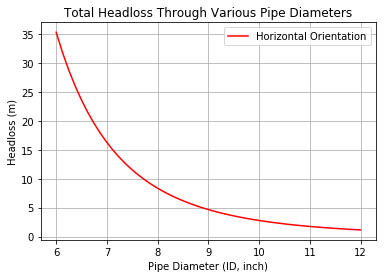

50
50


ValueError: setting an array element with a sequence.

In [18]:
pipe_diameters = np.linspace(6, 12) * u.inch
headloss_various_diameters = pc.headloss(flow, pipe_diameters, pipe_length_trains,NU_WATER,PVC_ROUGHNESS,k_pipe)



plt.figure(0)
plt.plot(pipe_diameters, headloss_various_diameters, 'r-')
plt.xlabel('Pipe Diameter (ID, inch)')
plt.ylabel('Headloss (m)')
plt.title('Total Headloss Through Various Pipe Diameters')
plt.legend(['Horizontal Orientation', 'Vertical orientation'], loc='best')
plt.grid(True)
plt.show()
print(pipe_diameters.size)
print(headloss_various_diameters.size)
np.array([pipe_diameters,headloss_various_diameters])
#pd.DataFrame(np.array([pipe_diameters,headloss_various_diameters]))